<a href="https://colab.research.google.com/github/imsr30/minorprojDSML/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation,Flatten,Conv2D,MaxPooling2D 

In [2]:
imgadd='/content/drive/My Drive/AorL Images'
types=["Dogs","Cats"]


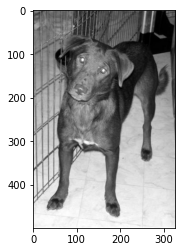

In [3]:
for i in types:
  path=os.path.join(imgadd,i)
  for j in os.listdir(path):
    stoarr=cv2.imread(os.path.join(path,j),cv2.IMREAD_GRAYSCALE)
    plt.imshow(stoarr, cmap="gray") 
    break
  break
  


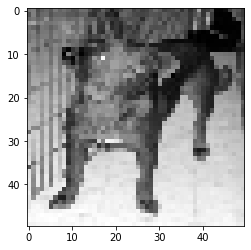

In [4]:
imgarr=cv2.resize(stoarr,(50,50))
plt.imshow(imgarr, cmap="gray")

In [5]:
datatrain=[]

def createdatatrain():
  for i in types:
    path=os.path.join(imgadd,i)
    typenum=types.index(i)
    for j in os.listdir(path):
      try:
        stoarr=cv2.imread(os.path.join(path,j),cv2.IMREAD_GRAYSCALE)
        imgarr=cv2.resize(stoarr,(50,50))
        datatrain.append([imgarr,typenum])
      except Exception as e:
        pass


createdatatrain()      

In [6]:
print(len(datatrain))

10


In [7]:
random.shuffle(datatrain)


In [8]:
for a in datatrain[:10]:
  print(a[1])


1
0
1
1
0
1
0
1
0
0


In [9]:
x=[]
y=[]

for k,v in datatrain:
  x.append(k);
  y.append(v);

X=np.array(x).reshape(-1,50,50,1)



In [ ]:
X=X/255.0



model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=2, epochs=1, validation_split=0.1)